# Supervised Learning : Lesson 2 - Implementing Locally weighted Linear Regression to solve the problem of underfitting the data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


## Loading the data 

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.keys()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
df_sample = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Price']]

In [9]:
X = df_sample.drop('Price', axis = 1)
y = df_sample[['Price']]

In [10]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms
0,79545.458574,5.682861,7.009188,4.09
1,79248.642455,6.002900,6.730821,3.09
2,61287.067179,5.865890,8.512727,5.13
3,63345.240046,7.188236,5.586729,3.26
4,59982.197226,5.040555,7.839388,4.23


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
y_scaler = scaler.fit_transform(y)

In [12]:
X_scaler

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495]])

In [13]:
y_scaler

array([[-0.49008146],
       [ 0.77550829],
       [-0.49021053],
       ...,
       [-0.570244  ],
       [-0.0946402 ],
       [ 0.18941143]])

In [15]:
X_scaler.shape , y_scaler.shape

((5000, 4), (5000, 1))

In [17]:
# Shuffling the dataset 
np.random.seed(42)
# Now we will split the dataset into training and testing sets
rng = np.random.default_rng(seed=42) # creating a random number generator object
idx = rng.permutation(X_scaler.shape[0]) # generating a random permutation of indices
train_ratio = 0.8

In [19]:
train_samples = int(train_ratio * X_scaler.shape[0]) # number of trianing samples

In [21]:
train_idx, test_idx = idx[:train_samples], idx[train_samples:] # splitting the indices into training and testing sets
X_train, y_train = X_scaler[train_idx], y_scaler[train_idx]
X_test,  y_test  = X_scaler[test_idx],  y_scaler[test_idx]

## Equations and the operations involved in LWR

### Calculating the weights

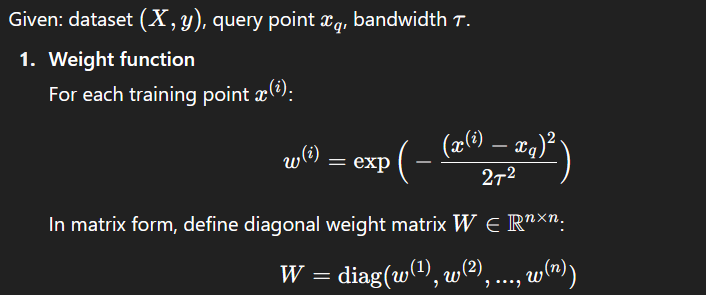

In [28]:
# Weight function 

def get_weights(X , x_query , tau):
    """
    This function is calculating the weight for each query 

    X: training features , shape(n,d)
    x_query: single query point , shape(d,)
    tau : bandwith paremeter(think of it like a context window)
    returns : diagonal weight matrix W , shape(n,n)
    """

    m = X.shape[0]
    W = np.eye(m) # diagonal matrix of 1'

    for i in range(m):
        diff = X[i] - x_query
        W[i,i] = np.exp(-(diff @ diff.T) / (2* tau**2))

    return W

### Now we will use the equation to find the theta to minimise our J(theta) function
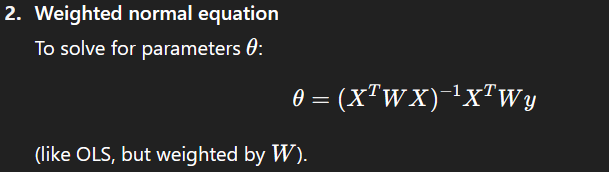

In [30]:
def fit_theta(X,y,x_query, tau):
    """
    X: training features with bias column, shape (n, d)
    y: target vector, shape (n, 1)
    x_query: query point (d,)
    tau: bandwidth
    returns: theta for this local regression

    """
    W = get_weights(X,x_query, tau)
    XTWX = X.T @ W @ X
    XTWy = X.T @ W @ y

    theta = np.linalg.pinv(XTWX) @ XTWy
    return theta

### Now we make the prediction 

In [32]:
# 3. Predict for a query point
def predict_lwr(X, y, x_query, tau):
    """
    Predict y_hat at query point x_query
    """
    theta = fit_theta(X, y, x_query, tau)
    return x_query @ theta


In [34]:
def lwr_predict(X, y, X_test, tau):
    """
    Run LWR for each query point in X_test
    """
    y_pred = []
    for x_q in X_test:
        y_hat = predict_lwr(X, y, x_q, tau)
        y_pred.append(y_hat)
    return np.array(y_pred)

In [35]:
# Example usage
tau = 0.5  # bandwidth
y_pred = lwr_predict(X_train, y_train, X_test, tau)

print(y_pred[:5])  # first few predictions


[[-0.19261274]
 [-0.25128392]
 [ 1.42523129]
 [-0.32770653]
 [-1.01258729]]


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²:  {r2:.4f}")


MSE: 0.2583
MAE: 0.4034
R²:  0.7269


          Method       MSE       MAE        R²    Time (s)
0       Batch GD  0.599815  0.624936  0.365758    0.026416
1            SGD  0.545977  0.595696  0.422686   17.668232
2  Mini-batch GD  0.545068  0.594911  0.423647    0.903366
3            LWR  0.258300  0.403400  0.726900  106.000000


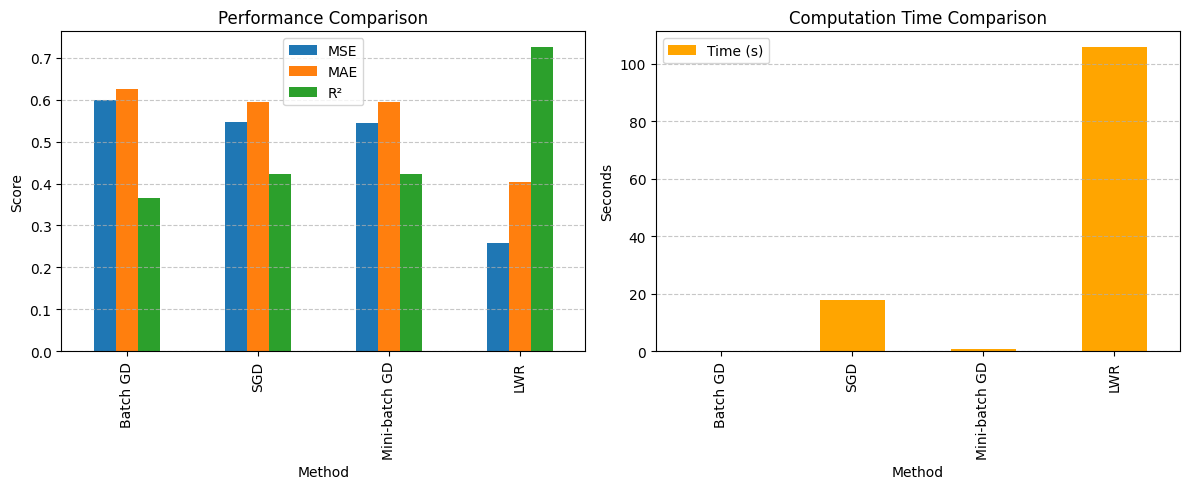

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Results dictionary
results = {
    "Method": ["Batch GD", "SGD", "Mini-batch GD", "LWR"],
    "MSE": [0.599815, 0.545977, 0.545068, 0.2583],
    "MAE": [0.624936, 0.595696, 0.594911, 0.4034],
    "R²":  [0.365758, 0.422686, 0.423647, 0.7269],
    "Time (s)": [0.026416, 17.668232, 0.903366, 106]  # 1min 46s ≈ 106s
}

# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Performance metrics
df_results.set_index("Method")[["MSE", "MAE", "R²"]].plot(kind="bar", ax=axes[0])
axes[0].set_title("Performance Comparison")
axes[0].set_ylabel("Score")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Time comparison
df_results.set_index("Method")[["Time (s)"]].plot(kind="bar", ax=axes[1], color="orange")
axes[1].set_title("Computation Time Comparison")
axes[1].set_ylabel("Seconds")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


## Comparison 

Accuracy side:
* LWR is clearly the best in terms of accuracy:
* Lowest MSE (0.2583) → smallest squared errors.
* Lowest MAE (0.4034) → smallest average error.
* Highest R² (0.727) → explains ~73% of the variance in housing prices (vs only ~42% for linear regression).

So if accuracy is the only goal, LWR wins.

Time side:
* Batch GD is insanely fast (0.026s).
* LWR is very slow (106s).
* SGD is the slowest among gradient-based methods because it updates weights for each sample. Mini-batch is the compromise.

So if speed matters, Batch GD wins.

The trade-off:
* LWR = high accuracy, slow (non-parametric, needs to re-fit for every query point).
* Batch GD = fast, but less accurate (parametric, once trained you’re done).

So the “best” depends on the situation:
* If you want interpretability + deployment on large-scale data, use Batch GD or Mini-batch.
* If you want local accuracy in small datasets (where speed doesn’t matter much), LWR is better.

## CONS 
Locally Weighted Regression is slow compared to ordinary least squares.
Here’s why:

In OLS, you solve the normal weighted equation once.

➝ That means prediction is as expensive as re-training for each new point.
➝ Time complexity: O(n³) per query if naïve, though with optimizations (no full inversion, matrix tricks) it can be brought down a bit.